## Import Things

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Data

In [2]:
#Training
train_news_df = pd.read_csv('D:\\Competitions\\UnBDC 2021\\Data\\covid_fake_news-main\\data\\Constraint_Train.csv')
train_news_df['Binary'] = ''
for i in range(0, len(train_news_df)):
    if train_news_df['label'][i] == 'real':
        train_news_df['Binary'][i] = 1
    else:
        train_news_df['Binary'][i] = 0

<ipython-input-2-df0db15df909>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_news_df['Binary'][i] = 1
<ipython-input-2-df0db15df909>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_news_df['Binary'][i] = 0


In [3]:
#Testing
test_news_df = pd.read_csv('D:\\Competitions\\UnBDC 2021\\Data\\covid_fake_news-main\\data\\english_test_with_labels.csv')
test_news_df['Binary'] = ''
for i in range(0, len(test_news_df)):
    if test_news_df['label'][i] == 'real':
        test_news_df['Binary'][i] = 1
    else:
        test_news_df['Binary'][i] = 0

<ipython-input-3-31937fca94c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_news_df['Binary'][i] = 1
<ipython-input-3-31937fca94c3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_news_df['Binary'][i] = 0


## Clean Text

In [4]:
#Training
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(train_news_df)):
    headline = re.sub('[^a-zA-Z]', ' ', train_news_df['tweet'][i])
    headline = headline.lower()
    headline = headline.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    headline = [ps.stem(word) for word in headline if not word in set(all_stopwords)]
    headline = ' '.join(headline)
    corpus.append(headline)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#Testing
test_corpus = []
for i in range(0, len(test_news_df)):
    test_headline = re.sub('[^a-zA-Z]', ' ', test_news_df['tweet'][i])
    test_headline = test_headline.lower()
    test_headline = test_headline.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    test_headline = [ps.stem(word) for word in test_headline if not word in set(all_stopwords)]
    test_headline = ' '.join(test_headline)
    test_corpus.append(test_headline)

## Create Bag of Words Model

In [6]:
#Training
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X_train = cv.fit_transform(corpus).toarray()
y_train = train_news_df.iloc[:, -1].values
y_train = y_train.astype('int')

In [7]:
#Testing
X_test = cv.fit_transform(test_corpus).toarray()
y_test = test_news_df.iloc[:, -1].values
y_test = y_test.astype('int')

## Gaussian Naive Bayes Model

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[369 651]
 [561 559]]
0.4336448598130841


In [10]:
print('f1=',f1_score(y_test, y_pred))

f1= 0.47982832618025756


## Bernoulli Naive Bayes Model

In [11]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

In [12]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[916 104]
 [934 186]]
0.5149532710280373


In [13]:
print('f1=',f1_score(y_test, y_pred))

f1= 0.26382978723404255


In [14]:
#Best
classifier = BernoulliNB(alpha = 0.9)
classifier.fit(X_train, y_train)

BernoulliNB(alpha=0.9)

In [15]:
#Best
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[907 113]
 [923 197]]
0.5158878504672897


In [16]:
#Best
print('f1=',f1_score(y_test, y_pred))

f1= 0.2755244755244755


## Complement Naive Bayes Model

In [17]:
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, y_train)

ComplementNB()

In [18]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[767 253]
 [933 187]]
0.4457943925233645


In [19]:
print('f1=',f1_score(y_test, y_pred))

f1= 0.23974358974358972


In [20]:
#Best
classifier = ComplementNB(alpha = 1.4)
classifier.fit(X_train, y_train)

ComplementNB(alpha=1.4)

In [21]:
#Best
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[792 228]
 [950 170]]
0.44953271028037384


In [22]:
#Best
print('f1=',f1_score(y_test, y_pred))

f1= 0.22397891963109356


## Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 996   24]
 [1027   93]]
0.5088785046728972


In [25]:
print('f1=',f1_score(y_test, y_pred))

f1= 0.15036378334680675


In [26]:
#Best
classifier = LogisticRegression(random_state = 0, C = 6, max_iter = 200)
classifier.fit(X_train, y_train)

LogisticRegression(C=6, max_iter=200, random_state=0)

In [27]:
#Best
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[961  59]
 [952 168]]
0.5275700934579439


In [28]:
#Best
print('f1=',f1_score(y_test, y_pred))

f1= 0.24944320712694876


## K-Nearest Neighbours Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1020    0]
 [1120    0]]
0.4766355140186916


In [31]:
print('f1=',f1_score(y_test, y_pred))

f1= 0.0


## Linear Support Vector Machine Model

In [32]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(random_state = 0)
classifier.fit(X_train, y_train)

LinearSVC(random_state=0)

In [33]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[889 131]
 [893 227]]
0.5214953271028038


In [34]:
print('f1=',f1_score(y_test, y_pred))

f1= 0.3071718538565629


In [35]:
#Best
classifier = LinearSVC(random_state = 0, C = 3, max_iter = 2000)
classifier.fit(X_train, y_train)

LinearSVC(C=3, max_iter=2000, random_state=0)

In [36]:
#Best
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[893 127]
 [889 231]]
0.525233644859813


In [37]:
#Best
print('f1=',f1_score(y_test, y_pred))

f1= 0.3125845737483085


## Kernel SVM Model

In [38]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [39]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1001   19]
 [1001  119]]
0.5233644859813084


In [40]:
print('f1=',f1_score(y_test, y_pred))

f1= 0.1891891891891892


In [41]:
classifier = SVC(kernel = 'rbf', random_state = 0, C = 0.005)
classifier.fit(X_train, y_train)

SVC(C=0.005, random_state=0)

In [42]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[708 312]
 [256 864]]
0.7345794392523365


In [43]:
print('f1=',f1_score(y_test, y_pred))

f1= 0.7526132404181185


In [44]:
accuracy_df = pd.DataFrame(index = range(0, 100), columns = ['C', 'Accuracy'])
rang = np.arange(0.01, 1.01, 0.01)

for i in range(0, 100):
    rang[i] = format(rang[i], '.3f')
    
for i in range(0, 100):
    accuracy_df['C'][i] = rang[i]
    classifier = SVC(kernel = 'rbf', random_state = 0, C = rang[i])
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    accuracy_df['Accuracy'][i] = accuracy_score(y_test, y_pred)
    print(i)

accuracy_df

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


,C,Accuracy
0,0.01,0.723364
1,0.02,0.717757
2,0.03,0.712617
3,0.04,0.712617
4,0.05,0.71028
...,...,...
95,0.96,0.528505
96,0.97,0.528037
97,0.98,0.526168
98,0.99,0.524299


In [45]:
accuracy_df2 = pd.DataFrame(index = range(0, 9), columns = ['C', 'Accuracy'])
rang2 = np.arange(0.001, 0.01, 0.001)

for i in range(0, 9):
    rang2[i] = format(rang2[i], '.3f')
    
for i in range(0, 9):
    accuracy_df2['C'][i] = rang2[i]
    classifier = SVC(kernel = 'rbf', random_state = 0, C = rang2[i])
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    accuracy_df2['Accuracy'][i] = accuracy_score(y_test, y_pred)
    print(i)

accuracy_df2

0
1
2
3
4
5
6
7
8


,C,Accuracy
0,0.001,0.523364
1,0.002,0.523364
2,0.003,0.687383
3,0.004,0.733178
4,0.005,0.734579
5,0.006,0.730374
6,0.007,0.729439
7,0.008,0.724299
8,0.009,0.725234


In [46]:
accuracy_df.to_csv('D:\\Competitions\\UnBDC 2021\\0to100_accuracy.csv')
accuracy_df2.to_csv('D:\\Competitions\\UnBDC 2021\\0to1_accuracy.csv')

## XGBoost

In [19]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state = 0, n_estimators = 400)
classifier.fit(X_train, y_train)

C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:31:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1017    3]
 [1093   27]]
0.48785046728971965


In [21]:
classifier = XGBClassifier(random_state = 0, learning_rate = 0.01, n_estimators = 400, max_depth = 3, subsample = 0.8, colsample_bytree = 1, gamma = 1)
classifier.fit(X_train, y_train)

[15:33:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1019    1]
 [1054   66]]
0.5070093457943925


In [23]:
print('f1=',f1_score(y_test, y_pred))

f1= 0.11120471777590564


## K-Means Clustering

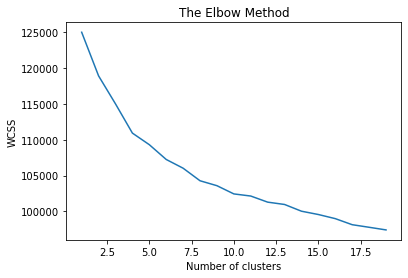

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_kmeans)
print(cm)
print(accuracy_score(y_test, y_kmeans))

[[1020    0]
 [1119    1]]
0.47710280373831776


In [32]:
print('f1=',f1_score(y_test, y_kmeans))

f1= 0.0017841213202497768


## Hierarchical Clustering

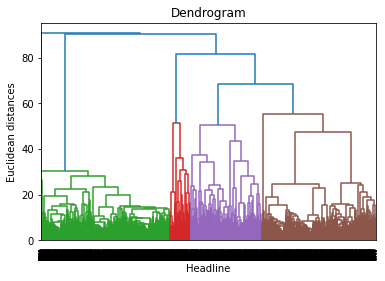

In [17]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Headline')
plt.ylabel('Euclidean distances')
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
hc.fit(X_train, y_train)

AgglomerativeClustering()

In [28]:
y_pred = hc.fit_predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1020    0]
 [1119    1]]
0.47710280373831776


In [29]:
print('f1=',f1_score(y_test, y_pred))

f1= 0.0017841213202497768


## Artificial Neural Network

In [8]:
import tensorflow as tf
tf.random.set_seed(0)

### Initialize ANN

In [121]:
ann = tf.keras.models.Sequential()

### Add Input Layer & First Hidden Layers

In [122]:
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

### Add Second Hidden Layer

In [123]:
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

### Add Output Layer

In [124]:
ann.add(tf.keras.layers.Dense(units=1))

### Compile ANN 

In [125]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Train ANN

In [126]:
ann.fit(X_train, y_train, batch_size = 30, epochs = 100)

Epoch 1/100
214/214 [==============================] - 1s 3ms/step - loss: 0.1012
Epoch 2/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0329
Epoch 3/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0130
Epoch 4/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 5/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 6/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 7/100
214/214 [==============================] - 1s 3ms/step - loss: 8.9895e-04
Epoch 8/100
214/214 [==============================] - 1s 3ms/step - loss: 5.4289e-04
Epoch 9/100
214/214 [==============================] - 1s 3ms/step - loss: 3.6792e-04
Epoch 10/100
214/214 [==============================] - 1s 3ms/step - loss: 2.5496e-04
Epoch 11/100
214/214 [==============================] - 1s 3ms/step - loss: 2.0709e-04
Epoch 12/100
214/214 [==============================] - 1s 3ms/step - loss: 

### Predict ANN

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
y_pred = ann.predict(X_test)
for i in range(0, len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[915 105]
 [901 219]]
0.5299065420560748


In [165]:
ann = tf.keras.models.Sequential()

In [166]:
ann.add(tf.keras.layers.Dense(units=50, activation='softmax'))

In [167]:
ann.add(tf.keras.layers.Dense(units=50, activation='softmax'))

In [168]:
ann.add(tf.keras.layers.Dense(units=1))

In [169]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [170]:
ann.fit(X_train, y_train, batch_size = 30, epochs = 100)

Epoch 1/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3616
Epoch 2/100
214/214 [==============================] - 1s 3ms/step - loss: 0.2281
Epoch 3/100
214/214 [==============================] - 1s 3ms/step - loss: 0.1543
Epoch 4/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0755
Epoch 5/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0356
Epoch 6/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0235
Epoch 7/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0187
Epoch 8/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0156
Epoch 9/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0133
Epoch 10/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0116
Epoch 11/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0102
Epoch 12/100
214/214 [==============================] - 1s 3ms/step - loss: 0.0090
Epoch 13/100


In [171]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
y_pred = ann.predict(X_test)
for i in range(0, len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[830 190]
 [751 369]]
0.5602803738317756
